In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation
from IPython.display import HTML
import scipy.optimize as opt
import time

np.set_printoptions(precision=3, suppress=True)

# 1. Zadanie programowania liniowego z ograniczeniami

Dany jest problem optymalizacji w następującej formie [1]
$$
\max_{x_1, x_2} \; 4x_1 + x_2 
$$
przy ograniczeniach danych jako:  
* ograniczenia nierównościowe:
$$
\begin{align}
x_1 + x_2 &\le 50 && \\  
3x_1 + x_2 &\le 90 \\  
\end{align}
$$
* ograniczenia zmiennych
$$
\begin{align}
x_1 &\ge 0 \\  
x_2 &\ge 0
\end{align}
$$

---
Źródło [[1]](https://ncert.nic.in/ncerts/l/lemh206.pdf) (25.08.2021)  

---

Zbiór rozwiązań dopuszczalnych problemu optymalizacji oraz funkcja celu dla wartości 20.

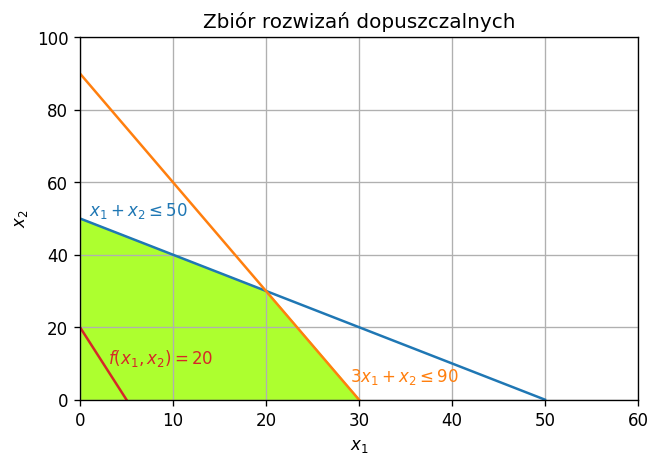

In [2]:
# Definicja ograniczeń
def c1(x1):
    return -x1 + 50


def c2(x1):
    return -3 * x1 + 90


# Definicja funkcji celu
def obj(x1, fval):
    return -4 * x1 + fval


# Wykres zbioru rozwiązań dopuszczalnych
x = np.linspace(0, 50, 101)
fig = plt.figure(dpi=120)
ax = plt.subplot()
ax.set_xlim((0, 60))
ax.set_ylim((0, 100))
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.grid()
ax.set_title("Zbiór rozwizań dopuszczalnych")
ax.plot(x, c1(x))
plt.annotate("$x_1 + x_2 \leq 50$", (1, 51), color="tab:blue")
ax.plot(x, c2(x))
plt.annotate("$3x_1 + x_2 \leq 90$", (29, 5), color="tab:orange")
ax.plot(x, obj(x, 20), color="tab:red")
plt.annotate("$f(x_1, x_2) = 20$", (3, 10), color="tab:red")
ax.fill_between(x, c1(x), where=x <= 20, color="greenyellow")
ax.fill_between(x, c2(x), where=np.logical_and(x >= 20, x <= 30), color="greenyellow")
plt.show()

Animacja rozwiązania problemu

In [3]:
fig = plt.figure(dpi=120)
ax1 = plt.subplot()
ax1.set_xlim((0, 60))
ax1.set_ylim((0, 100))
ax1.set_xlabel("$x_1$")
ax1.set_ylabel("$x_2$")
ax1.grid()

# Elementy statyczne
x = np.linspace(0, 50, 101)
(line1,) = ax1.plot(x, c1(x), color="tab:blue", lw=2)
(line2,) = ax1.plot(x, c2(x), color="tab:orange", lw=2)
ax1.fill_between(x, c1(x), where=x <= 20, color="greenyellow")
ax1.fill_between(x, c2(x), where=np.logical_and(x >= 20, x <= 30), color="greenyellow")

# Elementy dynamiczne
txt_title = ax1.set_title("")
(line3,) = ax1.plot([], [], color="tab:red", lw=2)
(pt0,) = ax1.plot([], [], color="tab:red", marker=".", ms=10)
(pt1,) = ax1.plot([], [], color="tab:red", marker=".", ms=10)
(pt2,) = ax1.plot([], [], color="tab:red", marker=".", ms=10)

# Funkcja animacji wywoływana cyklicznie
def drawframe(n):
    x = np.linspace(0, 50, 100)
    y3 = obj(x, n)
    line3.set_data(x, y3)
    xpt1 = (n - 50) / 3
    ypt1 = -xpt1 + 50
    xpt2 = n - 90
    ypt2 = -4 * xpt2 + n
    if xpt1 == 0:
        pt0.set_data(0, 50)
        pt0.set_markerfacecolor("gray")

    if xpt1 <= 20:
        pt1.set_data(xpt1, ypt1)
    else:
        pt1.set_markerfacecolor("gray")

    if xpt2 > 20 and xpt2 < 30:
        pt2.set_data(xpt2, ypt2)
    elif xpt2 >= 30:
        pt2.set_data(30, 0)
        pt2.set_markersize(20)
        pt2.set_marker("*")

    txt_title.set_text("fval = {0:4d}".format(n))
    return line3


# Eksport i rysowanie animacji
anim = animation.FuncAnimation(fig, drawframe, frames=200, interval=50)
plt.close()
HTML(anim.to_html5_video())

Optymalizacja algorytmem "Differential evolution"

In [4]:
def cfun(x):
    return -(4 * x[0] + x[1])


constr_mat = np.array([[1, 1], [3, 1]])
lc = opt.LinearConstraint(constr_mat, -np.inf, np.array([50, 90]))
bounds = opt.Bounds([0.0, 0.0], [1e6, 1e6])

opt_funval = []
opt_x = []
opt_times = []

for i in range(1, 100):
    start = time.time()
    result = opt.differential_evolution(cfun, bounds, constraints=(lc), polish=False)
    end = time.time()
    opt_funval.append(result.fun)
    opt_x.append(result.x)
    opt_times.append(end - start)

Średnia wartość funkcji celu

In [5]:
print(f"{np.mean(opt_funval):.3f}")

-119.879


Średnie wartości zmiennych decyzyjnych

In [6]:
print(f"{np.mean(opt_x, 0)}")

[29.929  0.161]


Średni czas wykonania pojedynczej optymalizacji

In [7]:
print(f"{np.mean(opt_times):.3f}")

0.153
